# Class Attendance Prediction in Python
### Data Scientist Associate Practical Exam Submission by RS Davidson

## Background

GoalZone is a fitness club chain in Canada. They offer a range of fitness classes in two capacities - 25 and 15. Some classes are always fully booked. Fully booked classes often have a low attendance rate. 

GoalZone wants to increase the number of spaces available for classes.
They want to do this by predicting whether the member will attend the class or not. If they can predict a member will not attend the class, they can make another space available.

## Data Description

The dataset contains **1500 rows and 8 columns** with missing values, inconsistent categories and incorrect types before cleaning. Field validation breakdown as follows:

1. **booking_id**: Dtype (int) converted to nominal. No missing values. 1500 unique ids.

2. **months_as_member**: Same as description. No missing values.

3. **weight**: Same as description. 20 missing values, replaced with the overall average weight. 

4. **days_before**: The dtype (object) does not match description, strings corrected using `str.replace()` and all values converted to numeric (integer). No missing values.

5. **day_of_week**: Categorical values were inconsistent with description, corrected using `str` slicing and mapped to 7 days of the week, and converted to nominal. No missing values.

6. **time**: Same as description. No missing values. Binary values (AM/PM) represented in the sample by a 3:1 ratio.

7. **category**: Same as description. Missing values (-) were replaced with "unknown".

8. **attended**: Dtype (int) converted to nominal. No missing values. Binary values (0/1) represented in the sample by a 3:1 ratio.

After cleaning, the dataset contains **1500 rows and 8 columns** with no missing values and is ready for EDA.

### Data Load and Initial Inspect

Load the initial dataframe and inspect dtypes, missing values, shape and sample top 5 rows for inspection:

In [94]:
# Complete package loads necessary for project
import pandas as pd
import numpy as np

# Data load 
df = pd.read_csv('fitness_class_2212.csv')

# Get info and shape of dataframe
print(df.info())
print(df.shape)

# print top 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
None
(1500, 8)


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


### Investigate and clean `days_before` field

The `days_before` field contains string values with suffix ' days', therefore field is cleaned with `str.replace()` and converting to numeric. Final check confirms all values are numeric with min of 1 and max of 29.

In [95]:
# Print unique values and counts
df['days_before'].value_counts()

# Remove non-numeric strings (' days') from the 'days_before' column
df['days_before'] = df['days_before'].str.replace(' days', '')

# Convert the 'days_before' column to numeric values
df['days_before'] = pd.to_numeric(df['days_before'], errors='coerce')

print(df['days_before'].describe())

count    1500.000000
mean        8.346667
std         4.077938
min         1.000000
25%         4.000000
50%         9.000000
75%        12.000000
max        29.000000
Name: days_before, dtype: float64


### Impute nulls in `weight` with mean

The `weight` field was revealed to be the only field containing missing values, replaced the 20 missing values with the overall average weight.

In [96]:
# Investigate missing values
df.isna().sum()

mean_weight = np.mean(df['weight'].dropna())
df['weight'] = df['weight'].fillna(mean_weight)

# Investigate missing values
df.isna().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

### Convert `booking_id` and `attended` to nominal

Using categorical variables over objects improves computational performance.

In [97]:
# Convert to categorical
df['booking_id'] = pd.Categorical(df['booking_id'])
df['attended'] = pd.Categorical(df['attended'])

### Numerics column validation
Confirm that all numeric columns are complete and consistent and are ready for statistical investigation.

In [98]:
# Numeric Column validation
df.describe()

,months_as_member,weight,days_before
count,1500.000000,1500.000000,1500.000000
mean,15.628667,82.610378,8.346667
std,12.926543,12.680411,4.077938
min,1.000000,55.410000,1.000000
25%,8.000000,73.562500,4.000000
50%,12.000000,81.035000,9.000000
75%,19.000000,89.382500,12.000000
max,148.000000,170.520000,29.000000


### Categorical column validation

Categorical variables are defined as `booking_id`, `day_of_week` ,`time`, `category`, `attended` and will be inpsected for consitency and completeness.

In [99]:
categories = ['booking_id', 'day_of_week' ,'time', 'category','attended']
for field in categories:
  print(df[field].value_counts())

1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: booking_id, Length: 1500, dtype: int64
Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64
AM    1141
PM     359
Name: time, dtype: int64
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64
0    1046
1     454
Name: attended, dtype: int64


### Clean `day_of_week` and convert to nominal category

`day_of_week` contained inconsistent categories that needed to be cleaned, and also converted into a categorical variable. Cleaning was as simple as trimming to the first 3 characters, then mapping to the same 7 days of the week as description.

In [100]:
# Shorten 'day_of_week' values to the first 3 letters
df['day_of_week'] = df['day_of_week'].str[:3]

# Convert 'day_of_week' to an ordinal category
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days, ordered=True)

# Validate the cleaned 'day_of_week' column
print(df['day_of_week'].value_counts())

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64


### Replace nulls and categorize `category`

In [101]:
# Remove and replace - values from the 'category' column
df['category'] = df['category'].str.replace('-', 'unknown')

# Convert 'category' to an nominal category
df['category'] = pd.Categorical(df['category'])

# Validate the cleaned 'category' column
print(df['category'].value_counts())

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64


### Categorize and order`time`

In [102]:
# Convert 'category' to an nominal category
df['time'] = pd.Categorical(df['time'], categories=['AM','PM'], ordered=True)

# Validate the cleaned 'category' column
print(df['time'].value_counts())

AM    1141
PM     359
Name: time, dtype: int64


### Final check

In [103]:
# Final dtype check
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   category
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   category
dtypes: category(5), float64(1), int64(2)
memory usage: 88.9 KB
None


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


## Exploritory Data Analysis

From **Figure 1**, it is visible that the majority (approximately 70%) of total bookings did not attend the class. The distribution of attendees is consistent between categories, with a small attendance rate across different class categories. Among the class categories, HIIT represents the majority in the sample, followed by Cycling and Strength.

In [90]:
# Calculate attended ratio per category using value_counts(normalize=True)
category_attendance_ratio = df.groupby('category')['attended'].value_counts(normalize=True).unstack().reset_index().round(2)

category_attendance_ratio

attended,category,0,1
0,Aqua,0.67,0.33
1,Cycling,0.71,0.29
2,HIIT,0.68,0.32
3,Strength,0.73,0.27
4,Yoga,0.69,0.31
5,unknown,0.85,0.15


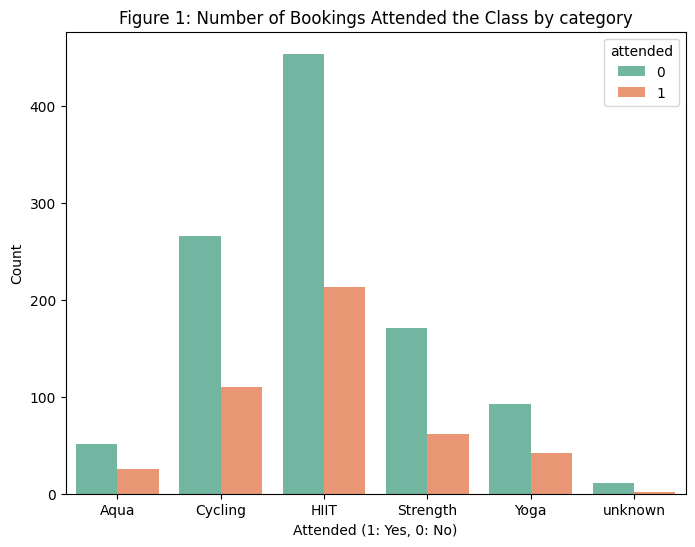

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot for 'attended' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df, palette='Set2', hue='attended')
plt.title('Figure 1: Number of Bookings Attended the Class by category')
plt.xlabel('Attended (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()


From **Figure 2.1**: Distribution of Number of Months as a Member, we can see the number of months is heavily skewed to the right, with a mean of around 10 and maximum of over 140 months.

In **Figure 2.2,** we apply a logarithmic transformation to `months_as_member` and can see the distribution (log of Number of Months as Member) is much closer to a normal distribution, and should therefore be used in modeling.

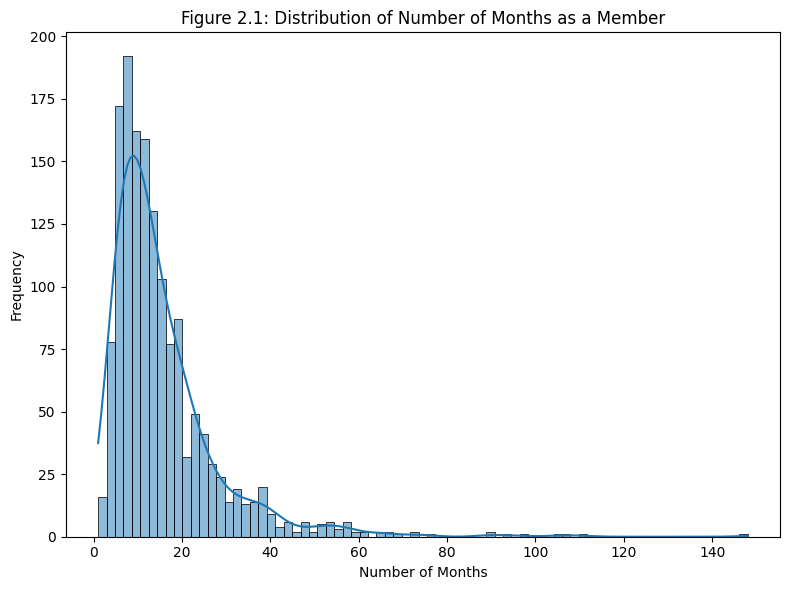

In [106]:
# Create a histogram for the distribution of months as a member
plt.figure(figsize=(8, 6))
sns.histplot(df['months_as_member'], kde=True)
plt.title('Figure 2.1: Distribution of Number of Months as a Member')
plt.xlabel('Number of Months')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


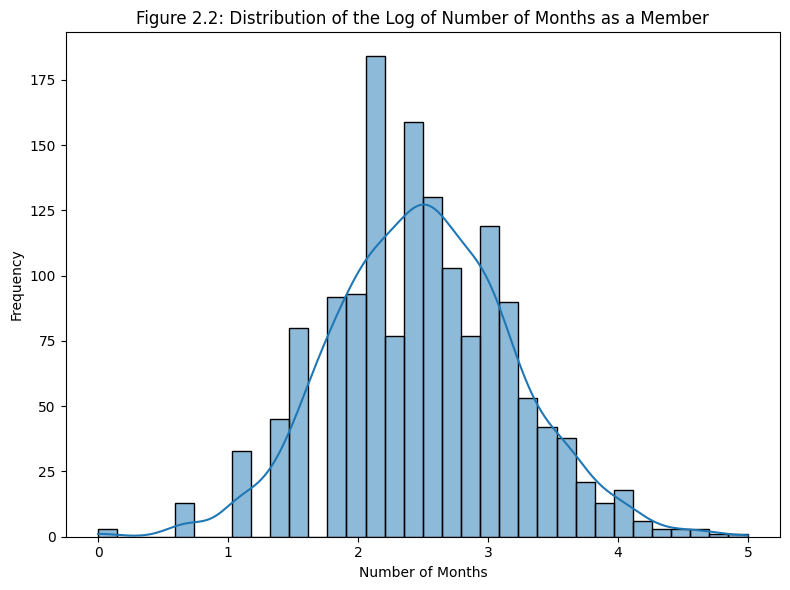

In [107]:
df['log_months_as_member'] = np.log(df['months_as_member'])

# Create a histogram for the distribution of months as a member
plt.figure(figsize=(8, 6))
sns.histplot(df['log_months_as_member'], kde=True)
plt.title('Figure 2.2: Distribution of the Log of Number of Months as a Member')
plt.xlabel('Number of Months')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


From **Figure 3.1** below, it is evident that `month_as_member` contains more spread for members that attended classes, with a much higher mean (more than 20 months as a member) and upper quartile (less than 60 months as a member), however doesn't represent the data well due to its skewed nature, with large amounts of outliers in each set.

From the box plot in **Figure 3.2** it is evident that the median, mean and inter-quartile ranges of log Number of Months as a Member are higher for responses that did attend. This suggests that, on average, members who attend the fitness classes remain members at the fitness club for a longer duration, and could be a key feature in the predictive model.

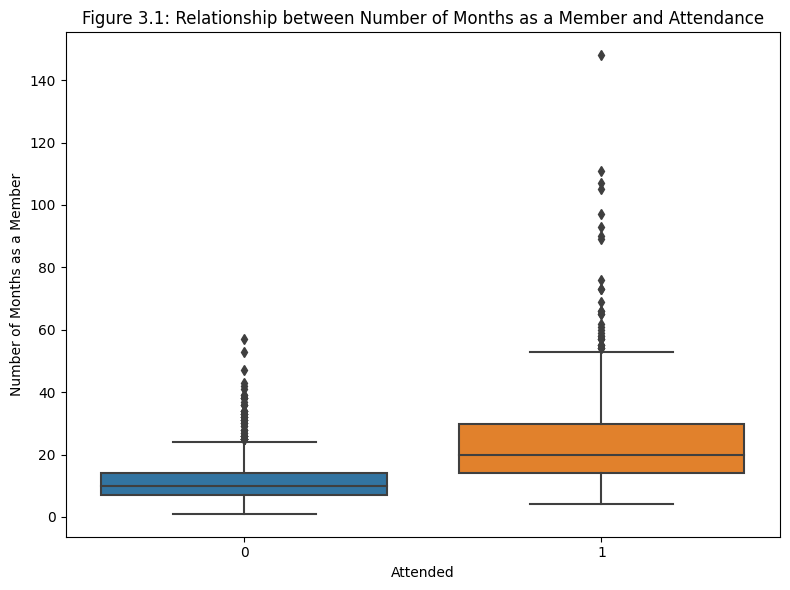

In [108]:
 # Create a box plot to show the relationship between attendance and months as a member
plt.figure(figsize=(8, 6))
sns.boxplot(y='months_as_member', x='attended', data=df)
plt.title('Figure 3.1: Relationship between Number of Months as a Member and Attendance')
plt.ylabel('Number of Months as a Member')
plt.xlabel('Attended')
plt.tight_layout()
plt.show()

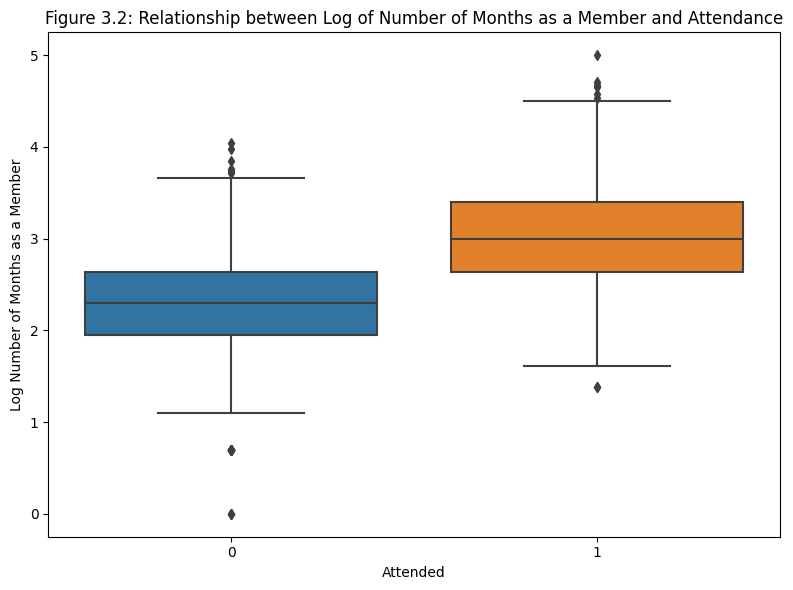

In [64]:
# Create a box plot to show the relationship between attendance and log months as a member
plt.figure(figsize=(8, 6))
sns.boxplot(y='log_months_as_member', x='attended', data=df)
plt.title('Figure 3.2: Relationship between Log of Number of Months as a Member and Attendance')
plt.ylabel('Log Number of Months as a Member')
plt.xlabel('Attended')
plt.tight_layout()
plt.show()


## Model 

The machine learning problem described is a binary classification problem.

In this context, the goal is to predict whether members will attend a fitness class or not, based on the given data features. Classification problems involve assigning predefined categories or labels to input data, making it suitable for predicting binary outcomes such as attendance (1: Attended, 0: Not Attended) in this case.

### Make changes to enable modeling
Finally, to enable model fitting, the following changes are applied to the clean data to define the feature variables `X` and the target variable `y`;

- Remove `booking_id` from features `X` as it contains unique values and won't add anything to the model.
- Convert all the categorical variables into numeric variables with One-Hot Encoding through `pd.get_dummies()` and assign to features `X`. First values are dropped to optimize performance as first values can be read as model intercepts.
- Apply log transformation to the `months_as_member` feature variable as per previous task.
- Apply a `StandardScaler()` on numeric variables to ensure even relational importance.
- Define `attended` as target variable `y`

Since the training data isn't too large, the entire dataset is available for testing and training, no sampling techniques are implemented.

In [112]:
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df[['day_of_week', 'time', 'category','log_months_as_member', 'weight', 'days_before']]
y = df['attended']

X = pd.get_dummies(X, columns=['day_of_week', 'time', 'category'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[0], y[0])

[ 0.47613632 -0.24063855 -0.08503864 -0.38655567  3.45413296 -0.43751773
 -0.50520305 -0.39449213 -0.40681834  1.78277115 -0.57837667 -0.89482975
  2.33190228 -0.31448545 -0.09350099] 0


## Baseline Model
Since this is a classification problem, a simple Logistic Regression model, with default parameters is fitted as the baseline model and evaluated with an accuracy score.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model with random state 42
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate Logistic Regression model
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print(f'Accuracy of the baseline Logistic Regression model: {lr_accuracy:.2f}')

Accuracy of the baseline Logistic Regression model: 0.78


## Comparison Model
For a comparison model, a more complex algorithm such as Random Forest Classifier is used. The model is define with default parameters and evaluated with an accuracy score.

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model with random state 42
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Logistic Regression model
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f'Accuracy of the comparison Random Forest Classifier model: {rf_accuracy:.2f}')

Accuracy of the comparison Random Forest Classifier model: 0.75


The choice to start with **Logistic Regression** as the baseline model provides a simple and interpretable benchmark for the problem. **Random Forest**, on the other hand, offers a more complex and powerful approach, making it a suitable candidate for comparison. 

By evaluating both models, we can assess whether the increased complexity of the Random Forest model leads to better predictive performance compared to the simplicity of Logistic Regression. This comparison allows for a better understanding of the trade-offs between model complexity and accuracy in this specific classification task.

## Evaluation

ROC AUC (Receiver Operating Characteristic Area Under the Curve) is a metric used to evaluate the performance of binary classification models. It quantifies the ability of a model to discriminate between positive and negative classes across different thresholds.

In the context of this problem, where GoalZone wants to predict whether a member will attend a class or not, ROC AUC is fitting because it takes into account both false positives and false negatives. False positives (predicting attendance when the member doesn't attend) and false negatives (predicting non-attendance when the member attends) have different consequences in this scenario.

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Calculate ROC AUC scores for logistic regression model
lr_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

# Calculate ROC AUC scores for random forest model
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f'ROC AUC score for Logistic Regression Model: {lr_roc_auc:.2f}')
print(f'ROC AUC score for Random Forest Model: {rf_roc_auc:.2f}')


ROC AUC score for Logistic Regression Model: 0.82
ROC AUC score for Random Forest Model: 0.77


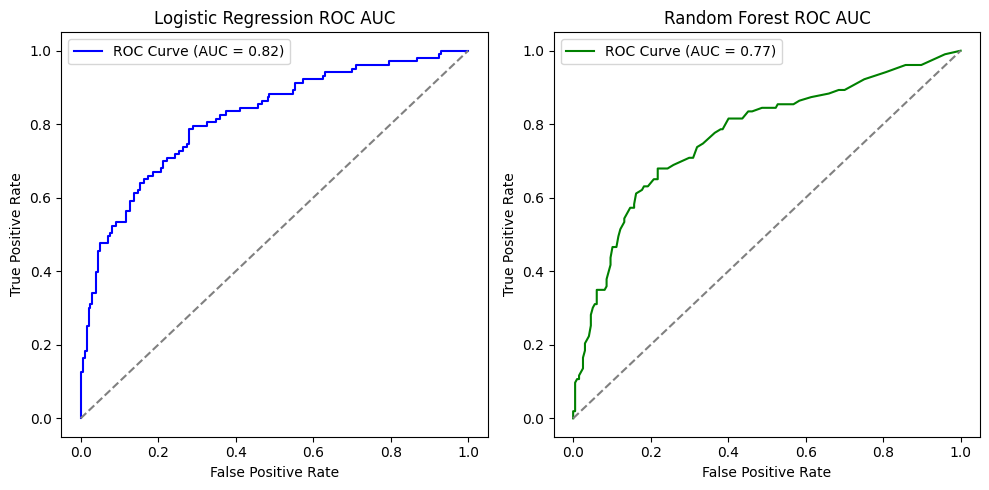

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for both models
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score for logistic regression model
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_roc_auc = roc_auc_score(y_test, lr_probs)

# Compute ROC curve and ROC AUC score for random forest model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_roc_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC AUC curves side by side
plt.figure(figsize=(10, 5))

# Logistic Regression ROC AUC Curve
plt.subplot(1, 2, 1)
plt.plot(lr_fpr, lr_tpr, color='b', label=f'ROC Curve (AUC = {lr_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC AUC')
plt.legend()

# Random Forest ROC AUC Curve
plt.subplot(1, 2, 2)
plt.plot(rf_fpr, rf_tpr, color='g', label=f'ROC Curve (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC AUC')
plt.legend()

plt.tight_layout()
plt.show()


Additionally, we can compare confusion matrices for both models, to better compare evaluation metrics such as `precision`, `recall` and `f1` score.

In [92]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion matrix, precision, recall, and F1 score for Logistic Regression model
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

print("Confusion Matrix for Logistic Regression Model:")
print(lr_conf_matrix)
print("Precision: {:.2f}".format(lr_precision))
print("Recall: {:.2f}".format(lr_recall))
print("F1 Score: {:.2f}".format(lr_f1))

# Confusion matrix, precision, recall, and F1 score for Random Forest model
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("\nConfusion Matrix for Random Forest Model:")
print(rf_conf_matrix)
print("Precision: {:.2f}".format(rf_precision))
print("Recall: {:.2f}".format(rf_recall))
print("F1 Score: {:.2f}".format(rf_f1))


Confusion Matrix for Logistic Regression Model:
[[182  15]
 [ 51  52]]
Precision: 0.78
Recall: 0.50
F1 Score: 0.61

Confusion Matrix for Random Forest Model:
[[173  24]
 [ 50  53]]
Precision: 0.69
Recall: 0.51
F1 Score: 0.59


## Results

The ROC AUC scores for both the logistic regression and random forest models are quite close, indicating their similar ability to discriminate between attendees and non-attendees. 

Considering GoalZone's objective to increase the number of spaces available for classes while minimizing false positives, which in this context means wrongly predicting attendees, the logistic regression model is favored. With a higher ROC AUC score, as well as higher precision and f1 scores, the logistic regression model demonstrates a slightly better ability to balance between predicting attendance accurately and avoiding unnecessary allocations of resources. 

In summary, the logistic regression model performs better for GoalZone's specific objective of optimizing class attendance and resource allocation.